In [1]:
# import necessary Python packages
import matplotlib.pyplot as plt
import pandas as pd

# print message after packages imported successfully
print("import of packages successful")


import of packages successful


In [2]:
# import the files with COVID-19 cases in all of US from NY Times
url = 'https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv'

# initialize the main dataframe by reading the NY Times csv file and name it df
df = pd.read_csv(url)

# convert the dates into a format that is recognizable to Pandas
df['date'] = pd.to_datetime(df.date)

In [3]:
def spell_check(column):

  # define these as global variables as they will be referenced by other functions later
  global i, countyname, countystatename, ifcomma

  # set i as the keyboard input
  i = input()

  # if the dataframe does not contain the inputted text, keep on prompting the user to type it in correctly, it will only advance when typed correctly
  if df[column].str.contains(i).any() == False:

    print('\n')

    while df[column].str.contains(i).any() == False:

      i = input('You mispelled something, please try again: ')

  # if the county is being spell checked, set the countyname to what is inputted from the keyboard, and leave countystatename and ifcomma blank
  if column == 'county':

    countyname = i
    countystatename = ''
    ifcomma = ''

  # if the state is being spell checked, set the countystatename from the keyboard, and enable the comma that will later be used in the title
  else:

    countystatename = i
    ifcomma = ','


In [4]:
print('Input your county: ')

spell_check('county')

# make a new dataframe with the selected county from the previous cell and name it countydf
countydf = df[df.county == i].copy()

# print that the county was found
print('County found') 

Input your county: 
Centre
County found


In [10]:
# if there are is more than one county with the same name
if countydf.state.nunique() > 1:

  # print "There is more than one county with the same name"
  print("There is more than one county with the same name.")

  # ask for which state your county is located in
  print("Enter the state that your county is in: ")
  
  spell_check('state')

  # update the dataframe to only be that county
  countydf = countydf[countydf.state == i] 

  # print that the state was found
  print('State found')   


In [11]:
# define a function to find the new cases per day and new deaths per day and append the column to the existing countydf dataframe
def dif_in(column):

  countydf['dif' + column] = countydf[column] - countydf[column].shift(1)

In [12]:
# find the new cases per day using the dif_in function
dif_in('cases')

# find the new deaths per day using the dif_in function
dif_in('deaths')

In [13]:
# define function that converts the abbreviations(cases, difcases, deaths, difdeaths) into proper names which will be used to name the y-axis and title the graphs
def proper_name(inpropname):

  # capitalize the first letter for cases & deaths
  if len(inpropname) <= 6:

    propervarname = inpropname.capitalize()

  # make difdeaths and difcases into New Deaths per Day and New Cases per Day
  else:

    propervarname = 'New ' + inpropname[3:].capitalize() + ' per Day'

  return propervarname


In [14]:
# define the function to graph the data, takes one value as an input: the variable that will be graphed versus the date
def county_graph(variable):

  # if cases or the difference in cases is graphed, set a common graph color
  if variable == 'cases' or variable == 'difcases':
    
    graphcolor = "C0"

  # if deaths or the difference in deaths is graphed, set a common graph color
  elif variable == 'deaths' or variable == 'difdeaths':

    graphcolor = "C1"

  # initialize the line plot or graph
  countydf.plot(kind = 'line', x = 'date', y = variable, color = graphcolor, legend = None)

  # title the graph using the proper_name function
  plt.title('COVID-19 ' + proper_name(variable) + ' in ' + countyname + ' County' + ifcomma + ' ' + countystatename)
  
  # label the y-axis using the proper_name function & x-axis
  plt.ylabel(proper_name(variable))
  plt.xlabel('Date')

  # draw the graph
  plt.plot()

In [15]:
# print the options that are available to graph
print('Would you like to graph: Cases, Difference in Cases, Deaths, Difference in Deaths, or All 4')

# take an input, and set the whattograph variable as it
whattograph = input()

# if the option selected is not correctly spelled by the user, keep on trying
if (whattograph == 'Cases' or whattograph == 'Difference in Cases' or whattograph == 'Deaths' or whattograph == 'Difference in Deaths' or whattograph == 'All 4') == False:

  print('\n')

  while (whattograph == 'Cases' or whattograph == 'Difference in Cases' or whattograph == 'Deaths' or whattograph == 'Difference in Deaths' or whattograph == 'All 4') == False:

    whattograph = input("You mispelled something, please try again: ")

# if the option selected is correctly spelled by the user, print that it is
print('Option selected')


Would you like to graph: Cases, Difference in Cases, Deaths, Difference in Deaths, or All 4
All 4
Option selected


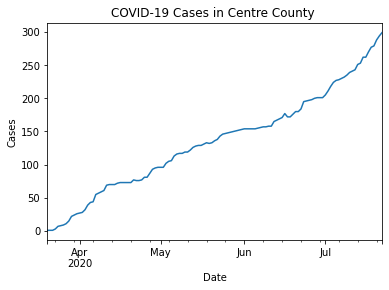

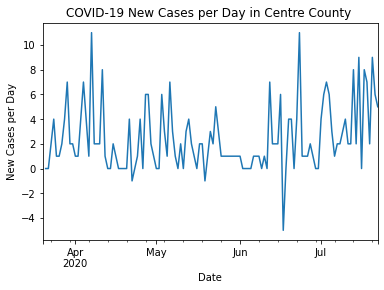

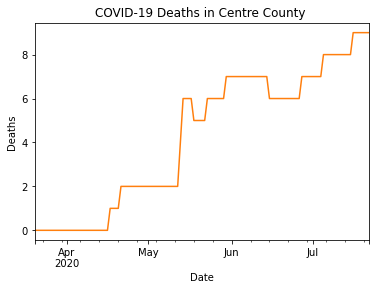

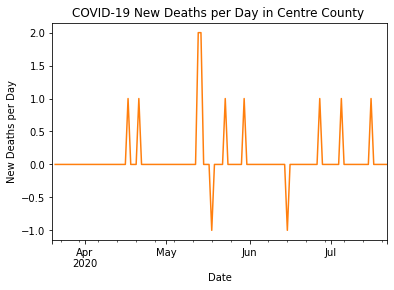

In [16]:
# if Cases was selected, graph the cases
if whattograph == 'Cases':

  county_graph('cases')

# if Difference in Cases was selected, graph the cases
elif whattograph == 'Difference in Cases':

  county_graph('difcases')

# if Deaths was selected, graph the deaths
elif whattograph == 'Deaths':

  county_graph('deaths')

# if Difference in Deaths was selected, graph the difference in deaths
elif whattograph == 'Difference in Deaths':

  county_graph('difdeaths')

# if All 4 was selected, graph all of the graphs
else:

  county_graph('cases')
  county_graph('difcases')
  county_graph('deaths')
  county_graph('difdeaths') 